#Load and prepare the data

In [ ]:
#mount drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [1]:
# base path = './'

base_path = '/content/drive/MyDrive/Colab Notebooks/midterm project/'
file_name = 'Sleep_health_and_lifestyle_dataset.csv'
file_path = base_path + file_name

In [2]:
file_path

'/content/drive/MyDrive/Colab Notebooks/midterm project/Sleep_health_and_lifestyle_dataset.csv'

In [3]:
# function to find encoding
import chardet


def get_file_encoding(file_name):
  with open(file=file_name, mode ='rb') as inp:
    encoding=chardet.detect(inp.read(10000))['encoding']
    return encoding

In [4]:
# load data

import numpy as np
import pandas as pd

data = pd.read_csv(file_path, encoding= get_file_encoding(file_path))

In [5]:

data['Sleep Disorder'] = data['Sleep Disorder'].fillna('Not Present')

In [6]:
data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Not Present
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Not Present
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Not Present
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Not Present
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Not Present
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Not Present


In [7]:
#list the variables

data.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


# Exploratory data analysis

In [8]:
data.shape

(374, 13)

In [9]:
data.duplicated().sum()

0

In [10]:
data.head().T

,0,1,2,3,4
Person ID,1,2,3,4,5
Gender,Male,Male,Male,Male,Male
Age,27,28,28,28,28
Occupation,Software Engineer,Doctor,Doctor,Sales Representative,Sales Representative
Sleep Duration,6.1,6.2,6.2,5.9,5.9
Quality of Sleep,6,6,6,4,4
Physical Activity Level,42,60,60,30,30
Stress Level,6,8,8,8,8
BMI Category,Overweight,Normal,Normal,Obese,Obese
Blood Pressure,126/83,125/80,125/80,140/90,140/90


In [11]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [12]:
for col in data.columns:
  print(col)
  print(data[col].unique()[:10])
  print(data[col].nunique())
  print()

Person ID
[ 1  2  3  4  5  6  7  8  9 10]
374

Gender
['Male' 'Female']
2

Age
[27 28 29 30 31 32 33 34 35 36]
31

Occupation
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson']
11

Sleep Duration
[6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9]
27

Quality of Sleep
[6 4 7 5 8 9]
6

Physical Activity Level
[42 60 30 40 75 35 45 50 32 70]
16

Stress Level
[6 8 7 4 3 5]
6

BMI Category
['Overweight' 'Normal' 'Obese' 'Normal Weight']
4

Blood Pressure
['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86']
25

Heart Rate
[77 75 85 82 70 80 78 69 72 68]
19

Daily Steps
[ 4200 10000  3000  3500  8000  4000  4100  6800  5000  7000]
20

Sleep Disorder
['Not Present' 'Sleep Apnea' 'Insomnia']
3



In [13]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [14]:
data.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [15]:
data.duplicated().sum()

0

In [16]:
 data["Sleep Disorder"].value_counts()

,count
Sleep Disorder,
Not Present,219
Sleep Apnea,78
Insomnia,77


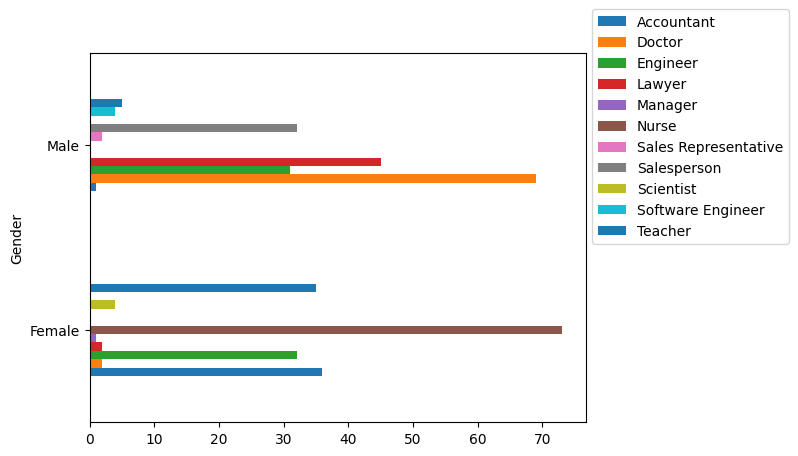

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

pd.crosstab(data["Gender"],data["Occupation"]).plot(kind="barh")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

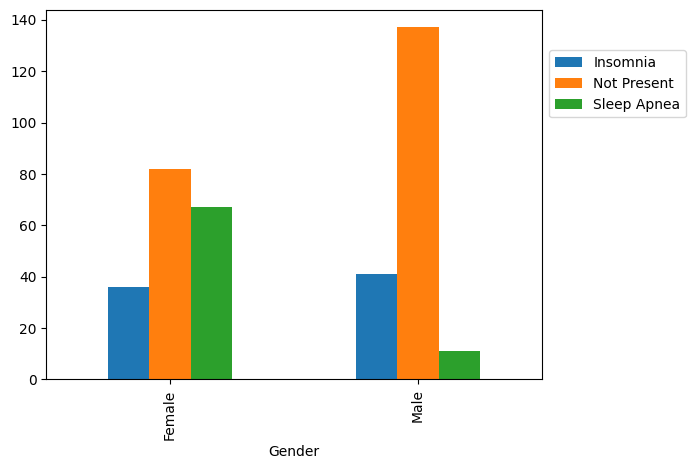

In [18]:
pd.crosstab(data["Gender"],data["Sleep Disorder"]).plot(kind="bar")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

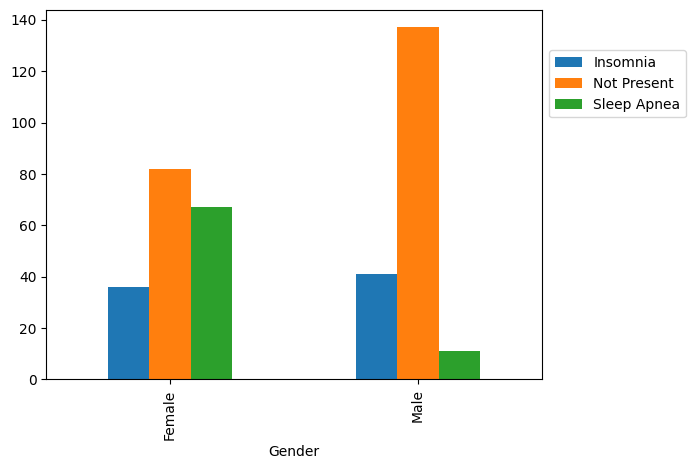

In [19]:
pd.crosstab(data["Gender"],data["Sleep Disorder"]).plot(kind="bar")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

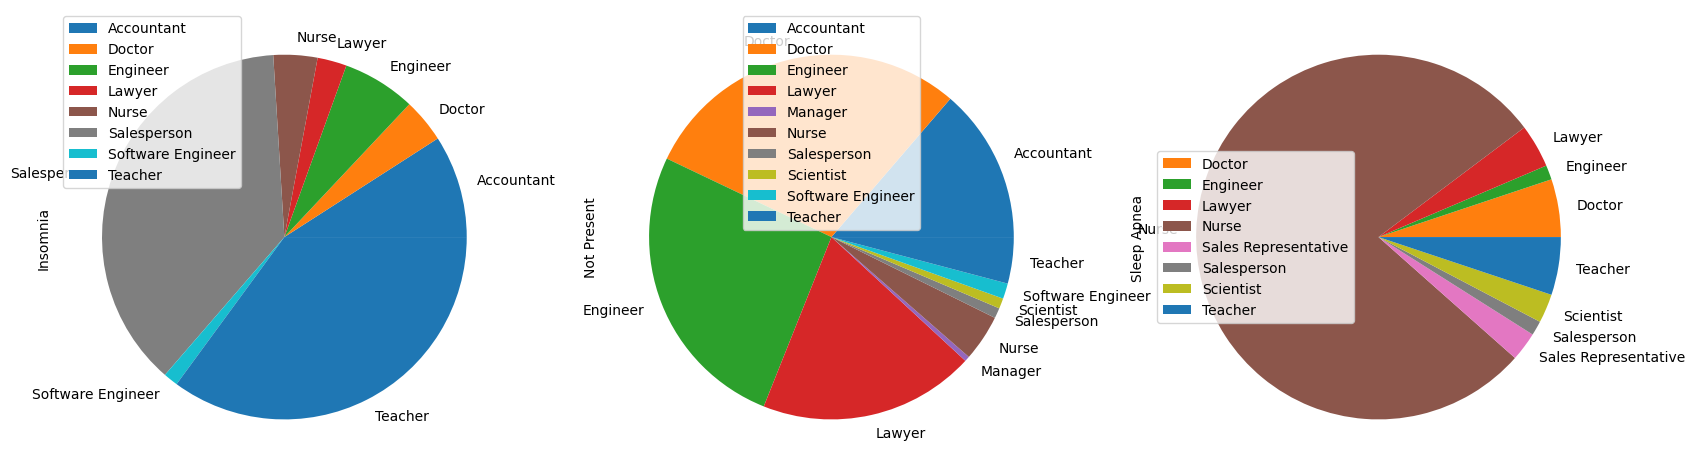

In [20]:
pd.crosstab(data["Occupation"],data["Sleep Disorder"]).plot(kind="pie", subplots=True, figsize=(20, 20))
plt.show()

In [21]:
# Applying Label Encoding

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Label Encoding
data['Blood Pressure'] = le.fit_transform(data['Blood Pressure'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Occupation'] = le.fit_transform(data['Occupation'])
data['BMI Category'] = le.fit_transform(data['BMI Category'])
data['Sleep Disorder'] = le.fit_transform(data['Sleep Disorder'])


print(data['Blood Pressure'].head())

0    11
1     9
2     9
3    22
4    22
Name: Blood Pressure, dtype: int64


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    int64  
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    int64  
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    int64  
 9   Blood Pressure           374 non-null    int64  
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 38.1 KB


In [25]:
data.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,3,11,77,4200,1
1,2,1,28,1,6.2,6,60,8,0,9,75,10000,1
2,3,1,28,1,6.2,6,60,8,0,9,75,10000,1
3,4,1,28,6,5.9,4,30,8,2,22,85,3000,2
4,5,1,28,6,5.9,4,30,8,2,22,85,3000,2


In [26]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [27]:
data.shape

(374, 13)

In [28]:
data.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [29]:
data["Sleep Disorder"].value_counts()

,count
Sleep Disorder,
1,219
2,78
0,77


# Feature importance analysis#




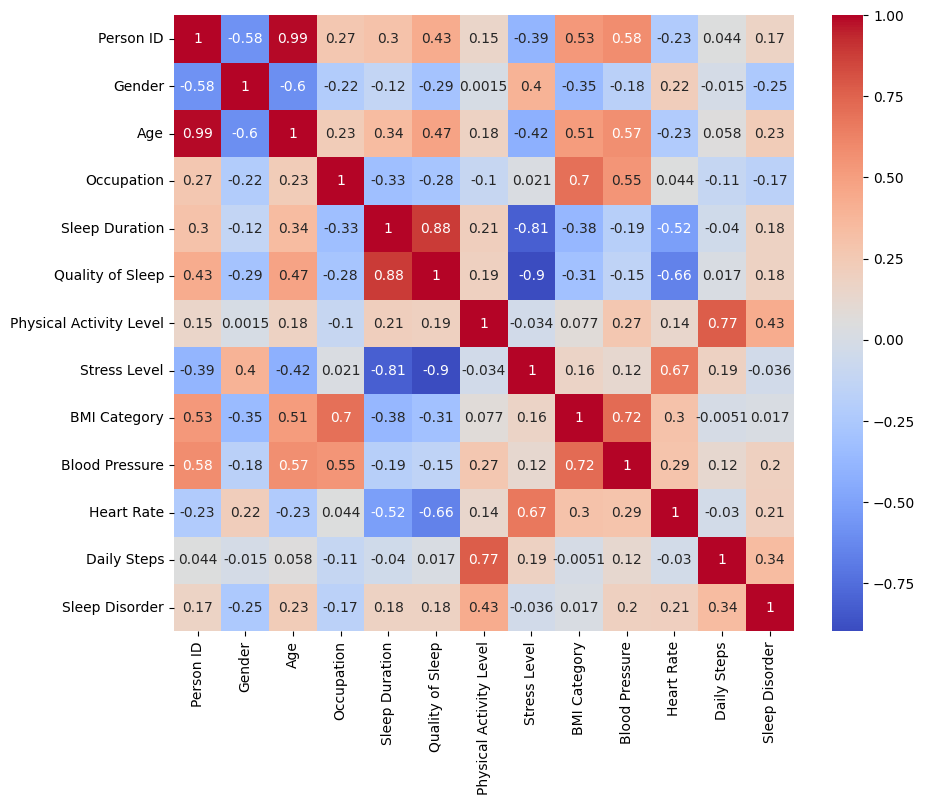

In [36]:

correlation_matrix = data.corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

                    feature  mi_score
0            Blood Pressure  0.517427
1               Daily Steps  0.478852
2            Sleep Duration  0.471217
3                       Age  0.465936
4                Occupation  0.460965
5   Physical Activity Level  0.395102
6              BMI Category  0.355355
7                Heart Rate  0.317673
8              Stress Level  0.289833
9          Quality of Sleep  0.212918
10                   Gender  0.118317


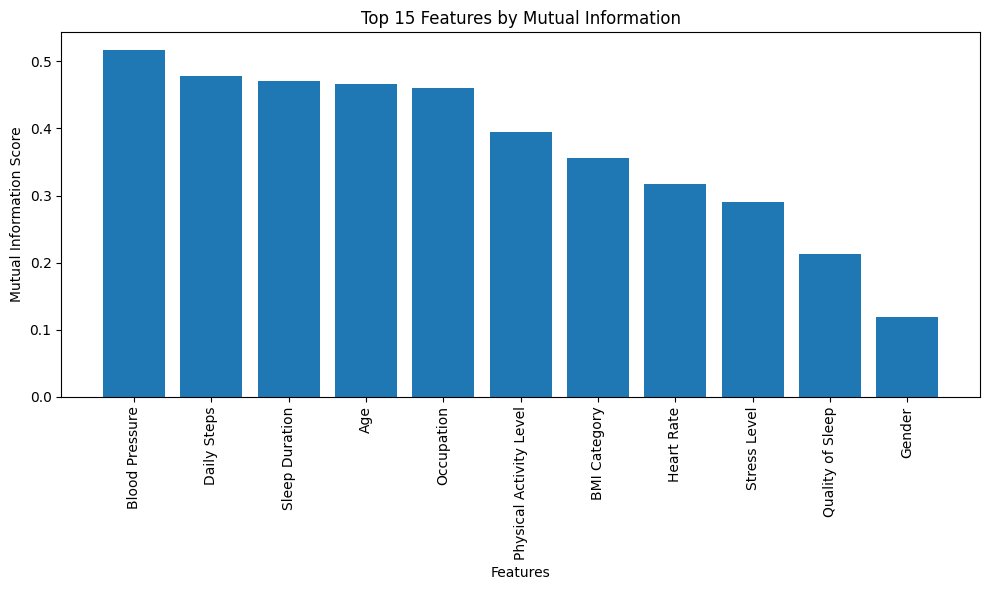

In [30]:
from sklearn.feature_selection import mutual_info_classif


X = data.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = data['Sleep Disorder']

# Calculation for mutual information
mi_scores = mutual_info_classif(X, y)

# dataframe of features and their mutual information scores
mi_data = pd.DataFrame({'feature': X.columns, 'mi_score': mi_scores})
mi_data = mi_data.sort_values('mi_score', ascending=False).reset_index(drop=True)


print(mi_data)

# Visualize the top 15 features
plt.figure(figsize=(10, 6))
plt.bar(mi_data['feature'][:15], mi_data['mi_score'][:15])
plt.title('Top 15 Features by Mutual Information')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [32]:
print(X.columns)


Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps'],
      dtype='object')


In [33]:
print(X.shape)

(374, 11)


In [35]:
print(y)

0      1
1      1
2      1
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder, Length: 374, dtype: int64


# Model selection and parameter tuning

In [37]:
# Stratify the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=55)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=55)

In [40]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y)

(224, 11)
(75, 11)
(75, 11)
0      1
1      1
2      1
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder, Length: 374, dtype: int64


In [44]:
# LogisticRegression


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score


# A simple parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 2, 50, 100],
    'max_iter': [500, 1000]
}

# The logistic regression model
lr = LogisticRegression(random_state=55)

# Grid search
grid_search = GridSearchCV(
    lr,
    param_grid,
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best estimator
lr_best = grid_search.best_estimator_

# Best parameters
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation balanced accuracy score:", grid_search.best_score_)

# Evaluation on validation set
val_pred = lr_best.predict(X_val)
val_bal = balanced_accuracy_score(y_val, val_pred)
val_precision = precision_score(y_val, val_pred, average='weighted')
val_recall = recall_score(y_val, val_pred, average='weighted')
val_f1 = f1_score(y_val, val_pred, average='weighted')


print("Validation balanced accuracy:", val_bal)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1 Score:", val_f1)

# Evaluation on test set
test_pred = lr_best.predict(X_test)
test_bal = balanced_accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_f1 = f1_score(y_test, test_pred, average='weighted')

print("Test balanced accuracy:", test_bal)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)


Best parameters: {'C': 0.1, 'max_iter': 500}
Best cross-validation balanced accuracy score: 0.8747388414055081
Validation balanced accuracy: 0.7931818181818183
Validation Precision: 0.8520330969267139
Validation Recall: 0.8533333333333334
Validation F1 Score: 0.8487581235968334
Test balanced accuracy: 0.8183080808080808
Test Precision: 0.8688888888888889
Test Recall: 0.8533333333333334
Test F1 Score: 0.8579310344827585


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
# RandomForest

from sklearn.ensemble import RandomForestClassifier



param_grid = {
    'n_estimators': [100, 150, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}


rf = RandomForestClassifier(random_state=55)


grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1
)


grid_search.fit(X_train, y_train)


rf_best = grid_search.best_estimator_


print("Best parameters:", grid_search.best_params_)
print("Best cross-validation balanced accuracy score:", grid_search.best_score_)


val_pred = rf_best.predict(X_val)
val_bal = balanced_accuracy_score(y_val, val_pred)
val_precision = precision_score(y_val, val_pred, average='weighted')
val_recall = recall_score(y_val, val_pred, average='weighted')
val_f1 = f1_score(y_val, val_pred, average='weighted')

print("Validation balanced accuracy:", val_bal)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1 Score:", val_f1)


test_pred = rf_best.predict(X_test)
test_bal = balanced_accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_f1 = f1_score(y_test, test_pred, average='weighted')

print("Test balanced accuracy:", test_bal)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)

Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation balanced accuracy score: 0.867616334283001
Validation balanced accuracy: 0.8674242424242425
Validation Precision: 0.9090118577075098
Validation Recall: 0.9066666666666666
Validation F1 Score: 0.900435465768799
Test balanced accuracy: 0.9266414141414141
Test Precision: 0.9330594779632007
Test Recall: 0.92
Test F1 Score: 0.923314358001265


In [43]:
#Gradient Boosting model

from sklearn.ensemble import GradientBoostingClassifier



param_grid = {
    'n_estimators': [100, 150, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}


gb = GradientBoostingClassifier(random_state=55)


grid_search = GridSearchCV(
    gb,
    param_grid,
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1
)


grid_search.fit(X_train, y_train)


gb_best = grid_search.best_estimator_


print("Best parameters:", grid_search.best_params_)
print("Best cross-validation balanced accuracy score:", grid_search.best_score_)


val_pred = gb_best.predict(X_val)
val_bal = balanced_accuracy_score(y_val, val_pred)
val_precision = precision_score(y_val, val_pred, average='weighted')
val_recall = recall_score(y_val, val_pred, average='weighted')
val_f1 = f1_score(y_val, val_pred, average='weighted')

print("Validation balanced accuracy:", val_bal)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1 Score:", val_f1)


test_pred = gb_best.predict(X_test)
test_bal = balanced_accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_f1 = f1_score(y_test, test_pred, average='weighted')

print("Test balanced accuracy:", test_bal)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation balanced accuracy score: 0.8394681861348529
Validation balanced accuracy: 0.8229797979797979
Validation Precision: 0.8819949494949496
Validation Recall: 0.88
Validation F1 Score: 0.8741724239433449
Test balanced accuracy: 0.8821969696969697
Test Precision: 0.9002462380300958
Test Recall: 0.8933333333333333
Test F1 Score: 0.8959152144357929


The Random Forest model emerges as the best-performing model among the three evaluated, demonstrating superior metrics across both validation and test sets. With a validation balanced accuracy of (0.8674) and a test balanced accuracy of (0.9266), it significantly outperforms both Logistic Regression and Gradient Boosting in terms of precision (0.9331), recall (0.9200), and F1 score (0.9233)

# Save the model

In [48]:
import pickle

filename = 'random_forest_model.pkl'
pickle.dump(rf_best, open(filename, 'wb'))
print(f"Model saved as {filename}")

Model saved as random_forest_model.pkl


In [49]:
# Save in colab

drive_filename = '/content/drive/MyDrive/Colab Notebooks/midterm project/random_forest_model.pkl'
pickle.dump(rf_best, open(drive_filename, 'wb'))
print(f"Model saved to Google Drive as {drive_filename}")

Model saved to Google Drive as /content/drive/MyDrive/Colab Notebooks/midterm project/random_forest_model.pkl
